## Importig libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## Data collection and analysis

In [2]:
df = pd.read_csv("D:\ML Projects\Customer Segmentation  - KMeans\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## selecting the specified columns

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

# we can also use iloc funtion to create "x"

In [9]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
x = x.values

In [11]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## choosing the optimum number of clusters using wcss

WCSS = With in Clusters Sum of Squares

In [12]:
# finding WCSS value for different clusters

wcss = []

for i in range(1,11): # choosing 10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'WCSS Value')

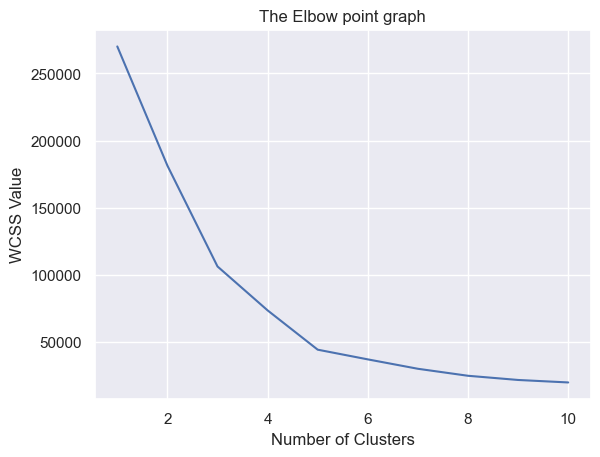

In [13]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow point graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")

In elbow graph, choose the point in which there is a drastic change in graph. here it is "5"

## Training the K-Means Clustering Model

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their clusters
y = kmeans.fit_predict(x)
print(y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualizing all the clusters

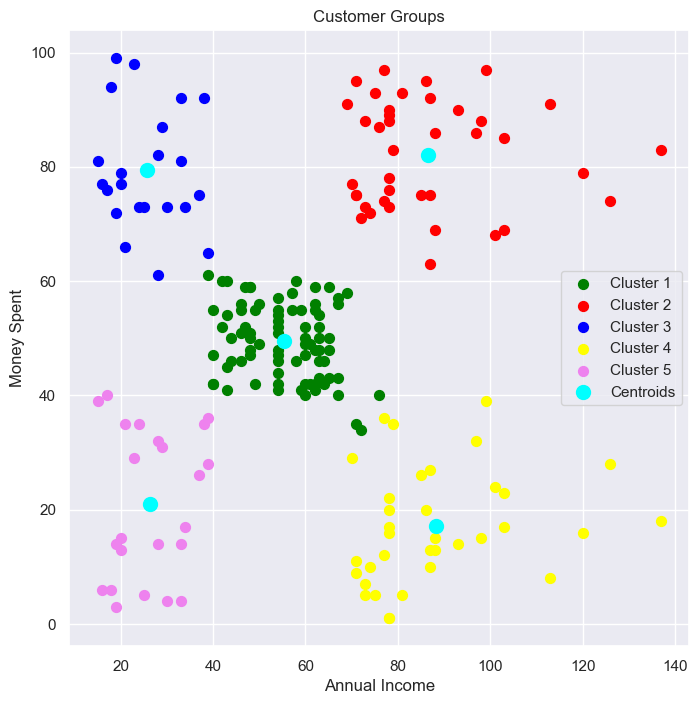

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, c='green', label="Cluster 1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, c='red', label="Cluster 2")
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=50, c='blue', label="Cluster 3")
plt.scatter(x[y == 3, 0], x[y == 3, 1], s=50, c='yellow', label="Cluster 4")
plt.scatter(x[y == 4, 0], x[y == 4, 1], s=50, c='violet', label="Cluster 5")

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Money Spent")
plt.legend()
plt.show()


## Gender spending

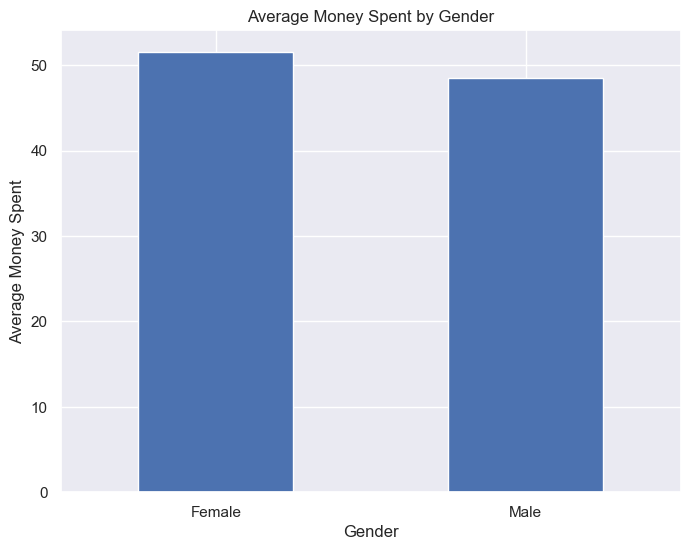

In [17]:
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].mean()

# Create a bar chart to visualize the mean spending for each gender
gender_spending.plot(kind='bar', figsize=(8, 6))
plt.title("Average Money Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Money Spent")
plt.xticks(rotation=0)
plt.show()


In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Money spend with respect to age group - Males

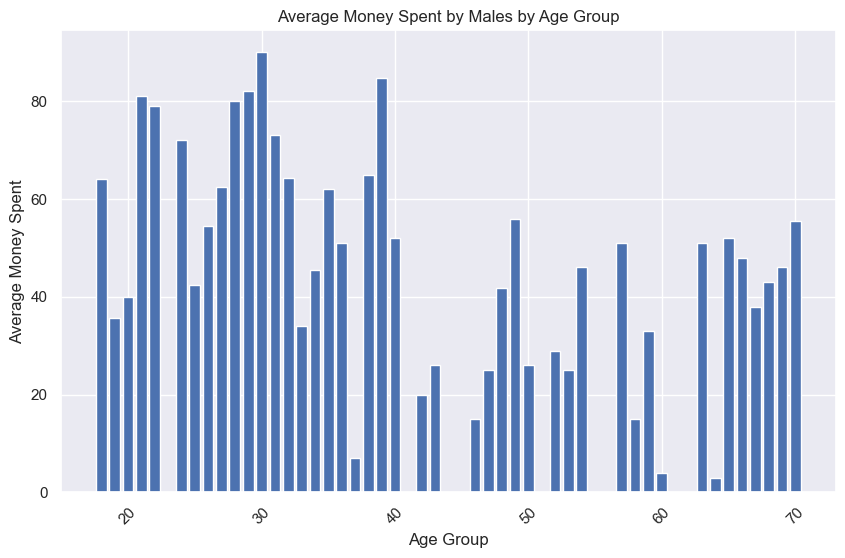

In [28]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Gender', 'Age', and 'Spending Score (1-100)' columns
# Filter the data to select only males
female_data = df[df['Gender'] == 'Female']

# Group the data by age and calculate the mean spending for each age group
female_age_spending = female_data.groupby('Age')['Spending Score (1-100)'].mean()

# Create a bar chart to visualize the average spending by males with respect to age group
plt.figure(figsize=(10, 6))
plt.bar(male_age_spending.index, male_age_spending.values)
plt.title("Average Money Spent by Males by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Money Spent")
plt.xticks(rotation=45)
plt.show()


## Money spend with respect to age groups - Females

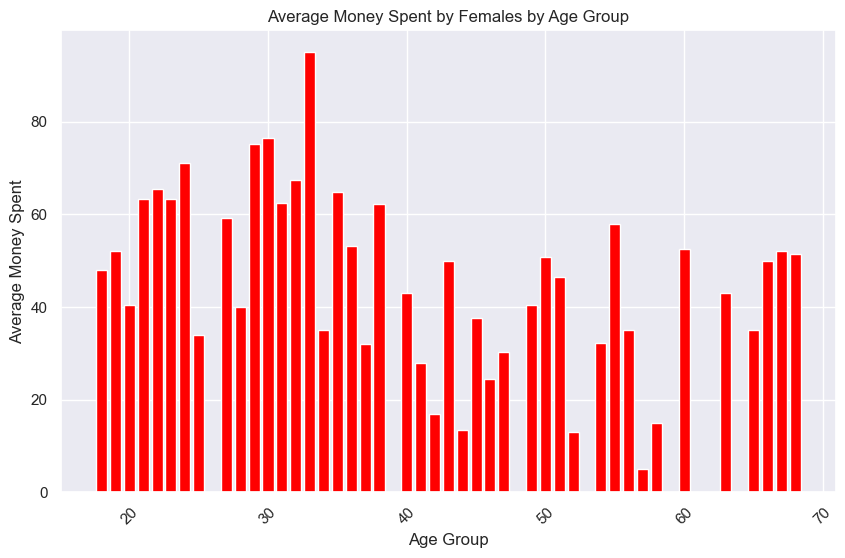

In [31]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Gender', 'Age', and 'Spending Score (1-100)' columns
# Filter the data to select only females
female_data = df[df['Gender'] == 'Female']

# Group the data by age and calculate the mean spending for each age group
female_age_spending = female_data.groupby('Age')['Spending Score (1-100)'].mean()

# Create a bar chart to visualize the average spending by females with respect to age group
plt.figure(figsize=(10, 6))
plt.bar(female_age_spending.index, female_age_spending.values, color='red')
plt.title("Average Money Spent by Females by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Money Spent")
plt.xticks(rotation=45)
plt.show()


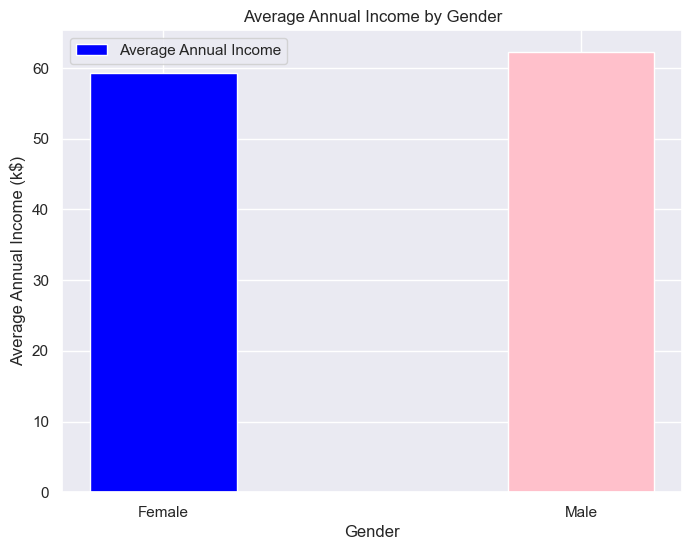

In [32]:
gender_income = df.groupby('Gender')['Annual Income (k$)'].mean()

# Create a grouped bar chart to visualize the mean annual income by gender
plt.figure(figsize=(8, 6))
x = range(len(gender_income.index))
width = 0.35

plt.bar(x, gender_income, width, label='Average Annual Income', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Annual Income (k$)')
plt.xticks(x, gender_income.index)
plt.title('Average Annual Income by Gender')
plt.legend()

## Pie chart for gender distribution

(-1.09999878776861,
 1.0999929225079865,
 -1.0999998909991102,
 1.0999999948094814)

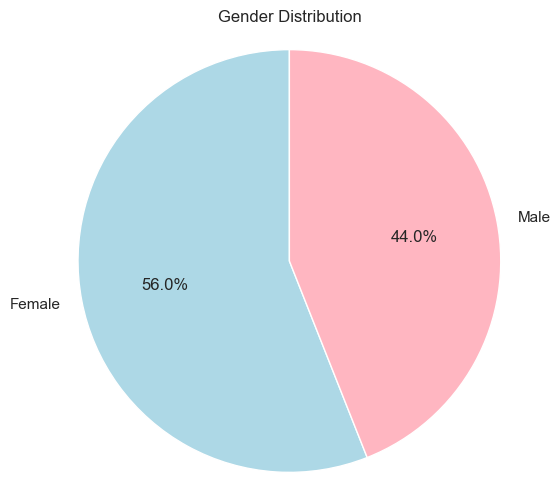

In [35]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.axis('equal') 

## Box plot: Spending score by gender

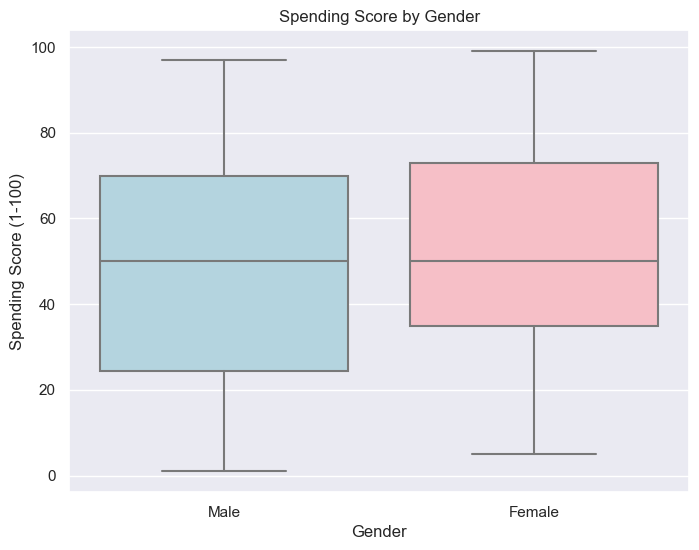

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette=['lightblue', 'lightpink'])
plt.title('Spending Score by Gender')
plt.show()